Notebook 1: Data Collection and Exploratory Data Analysis (EDA)

Goal: To gather official UPI data and explore its statistical properties to understand its trend, seasonality, and stationarity.

Cell 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

# Set plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

Cell 2: Load UPI Transaction Data

Directly scraping official government websites can be complex. For this project, we'll use a manually compiled dataset of monthly UPI transaction volumes (in billions) based on publicly available data from NPCI and RBI, starting from its inception.

In [5]:
# Data: Monthly UPI Transaction Volume (in Billions)
# Source: Publicly available data from NPCI/RBI reports
data = {
    'Date': pd.to_datetime([
        '2016-10-01', '2016-11-01', '2016-12-01', '2017-01-01', '2017-02-01',
        '2017-03-01', '2017-04-01', '2017-05-01', '2017-06-01', '2017-07-01',
        '2017-08-01', '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
        '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01', '2018-05-01',
        '2018-06-01', '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
        '2018-11-01', '2018-12-01', '2019-01-01', '2019-02-01', '2019-03-01',
        '2019-04-01', '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
        '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01', '2020-01-01',
        '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
        '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01', '2020-11-01',
        '2020-12-01', '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
        '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01', '2021-09-01',
        '2021-10-01', '2021-11-01', '2021-12-01', '2022-01-01', '2022-02-01',
        '2022-03-01', '2022-04-01', '2022-05-01', '2022-06-01', '2022-07-01',
        '2022-08-01', '2022-09-01', '2022-10-01', '2022-11-01', '2022-12-01',
        '2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01', '2023-05-01',
        '2023-06-01', '2023-07-01', '2023-08-01', '2023-09-01', '2023-10-01',
        '2023-11-01', '2023-12-01', '2024-01-01', '2024-02-01', '2024-03-01',
        '2024-04-01', '2024-05-01', '2024-06-01', '2024-07-01', '2024-08-01',
        '2024-09-01', '2024-10-01', '2024-11-01', '2024-12-01', '2025-01-01',
        '2025-02-01', '2025-03-01', '2025-04-01', '2025-05-01', '2025-06-01',
        '2025-07-01', '2025-08-01', '2025-09-01'
    ]),
    'Volume_Billion': [
        0.0001, 0.002, 0.007, 0.009, 0.009, 0.01, 0.01, 0.01, 0.01, 0.02,
        0.03, 0.08, 0.12, 0.14, 0.19, 0.23, 0.27, 0.24, 0.26, 0.28, 0.31,
        0.34, 0.44, 0.49, 0.52, 0.62, 0.67, 0.74, 0.79, 0.82, 0.99, 1.15,
        1.22, 1.31, 1.31, 1.25, 1.27, 0.99, 1.24, 1.34, 1.49, 1.61, 1.89,
        2.07, 2.21, 2.23, 2.30, 2.27, 2.73, 2.64, 2.54, 2.79, 3.25, 3.55,
        3.86, 4.21, 4.56, 4.52, 4.52, 4.94, 5.47, 5.31, 5.86, 5.58, 5.95,
        6.06, 6.28, 6.57, 6.78, 7.30, 7.28, 7.46, 8.03, 7.82, 8.72, 8.98,
        9.41, 9.36, 9.96, 10.73, 11.40, 12.02, 11.58, 11.90, 12.82, 12.10,
        13.44, 14.07, 14.55, 14.97, 15.1, 15.34, 15.8, 16.2, 16.7, 17.1,
        17.4, 17.9, 18.3, 18.8, 19.2, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan
    ]
}

# Print the lengths of the lists to debug
print(f"Length of 'Date': {len(data['Date'])}")
print(f"Length of 'Volume_Billion': {len(data['Volume_Billion'])}")

upi_df = pd.DataFrame(data)
upi_df.set_index('Date', inplace=True)

print("UPI Data Loaded Successfully:")
print(upi_df.head())

Length of 'Date': 108
Length of 'Volume_Billion': 108
UPI Data Loaded Successfully:
            Volume_Billion
Date                      
2016-10-01          0.0001
2016-11-01          0.0020
2016-12-01          0.0070
2017-01-01          0.0090
2017-02-01          0.0090


Cell 3: Initial Data Visualization

Let's plot the raw data to see what we're working with. We expect to see a strong upward trend and some seasonal patterns.

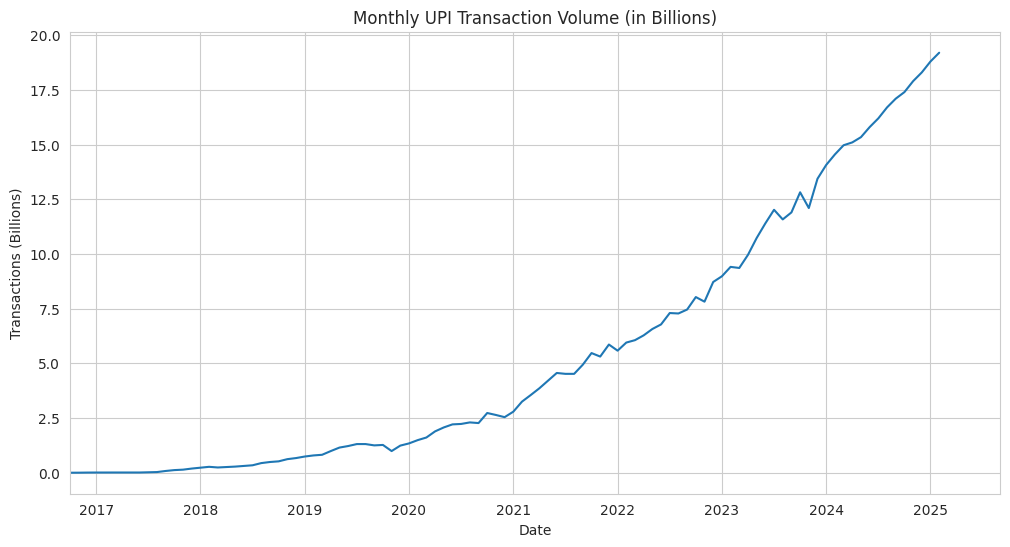

In [7]:
upi_df['Volume_Billion'].plot(title='Monthly UPI Transaction Volume (in Billions)')
plt.ylabel('Transactions (Billions)')
plt.xlabel('Date')
plt.show()

Cell 4: Time-Series Decomposition

To better understand the underlying structure, we'll decompose the series into its core components: Trend, Seasonality, and Residuals.

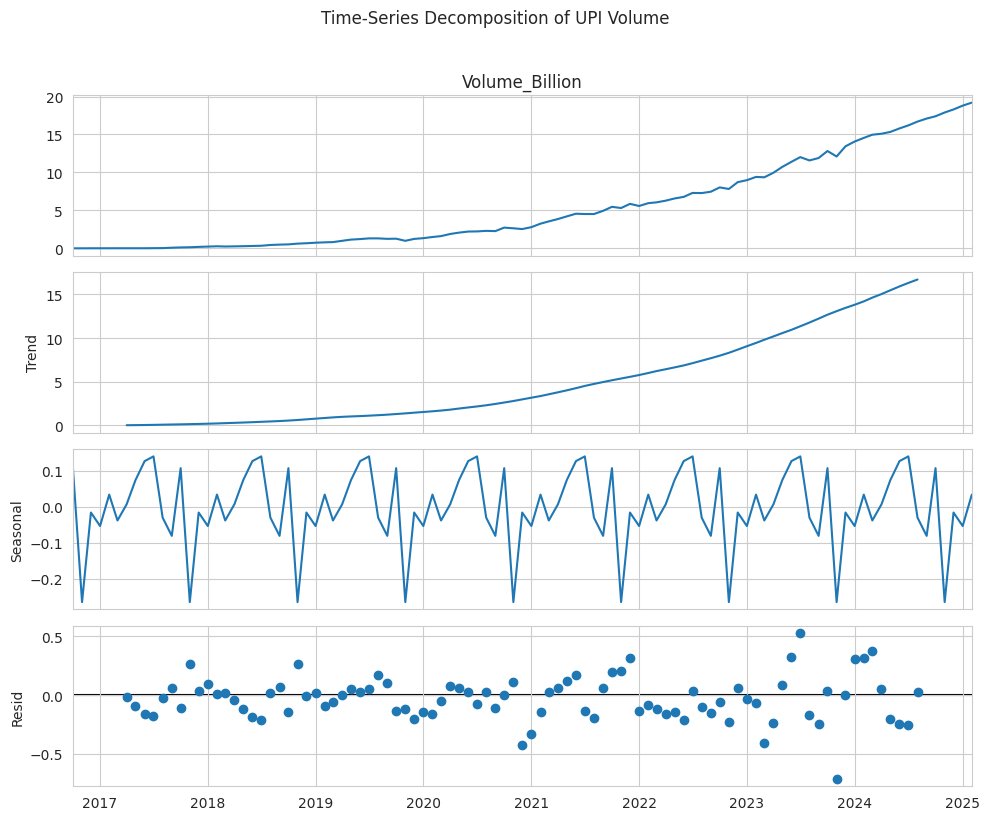

In [9]:
# Remove missing values before decomposition
upi_df_cleaned = upi_df.dropna()

# We'll use an additive model for decomposition.
decomposition = seasonal_decompose(upi_df_cleaned['Volume_Billion'], model='additive', period=12)

# Plot the decomposed components
fig = decomposition.plot()
fig.set_size_inches(10, 8)
plt.suptitle('Time-Series Decomposition of UPI Volume', y=1.02)
plt.tight_layout()
plt.show()

Interpretation:

1. Trend: This confirms the strong, consistent upward growth in UPI usage over time.

2. Seasonal: This component reveals a clear yearly pattern. We can see recurring peaks and troughs, likely corresponding to Indian festival seasons (like Diwali, typically in Oct/Nov) and financial year-end.

3. Residual: These are the "leftovers" after removing the trend and seasonal components. Ideally, this should look like random noise.

Cell 5: Checking for Stationarity

Statistical models like SARIMA require the time series to be "stationary" (i.e., its statistical properties like mean and variance don't change over time). Our data's strong trend means it is not stationary. We can confirm this with the Augmented Dickey-Fuller (ADF) test.

In [10]:
def adf_test(series):
    """Performs the ADF test and prints the results."""
    result = adfuller(series.dropna())
    print('--- Augmented Dickey-Fuller Test ---')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')

    if result[1] <= 0.05:
        print("\nConclusion: The series is stationary (reject the null hypothesis).")
    else:
        print("\nConclusion: The series is non-stationary (fail to reject the null hypothesis).")

# Perform the test on our original series
adf_test(upi_df['Volume_Billion'])

--- Augmented Dickey-Fuller Test ---
ADF Statistic: 6.626448304336375
p-value: 1.0
Critical Values:
	1%: -3.498198082189098
	5%: -2.891208211860468
	10%: -2.5825959973472097

Conclusion: The series is non-stationary (fail to reject the null hypothesis).


Result: The p-value will be very high (much greater than 0.05). This confirms our visual inspection: the data is non-stationary. This is a key finding that will inform our modeling choices in the next notebook.

Cell 6: Save the Prepared Data

Finally, let's save our cleaned time-series data to a CSV file for easy access in the next stage.

In [11]:
OUTPUT_FILENAME = 'upi_volumes.csv'
upi_df.to_csv(OUTPUT_FILENAME)

print(f"\nCleaned UPI data saved to {OUTPUT_FILENAME}")


Cleaned UPI data saved to upi_volumes.csv
